In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf
import sys
sys.path.append('../')
import wave_gan_resize

In [2]:
custom_objects = {
    'Resize': wave_gan_resize.Resize
}

In [3]:
generator = tf.keras.models.load_model('../flute_wpgan_linear_pitch_0729.h5', custom_objects=custom_objects)

In [4]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 16, 1024)          0         
_________________________________________________________________
resize (Resize)              (None, 64, 1024)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 512)           13107200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 512)           2

In [5]:
# Iterated below for saving multiple audio files
num = 0

In [6]:
noise = tf.random.normal([1, 100])
audio = generator(noise, training=False)
num += 1

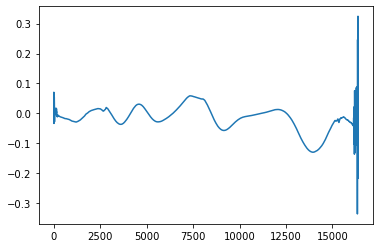

In [7]:
plt.plot(audio[0])

In [8]:
ipd.Audio(audio[0,:,0], rate=16000)

In [28]:
sf.write('./generated_audio/hybrid_wgan_nearest_{}.wav'.format(num), audio[0,:,0], 16000, subtype='PCM_16')